# **Disciplina CAT010** - Aplicações dos Satélites em Ciências Atmosféricas


---






## **Aula Prática 4:** $\underline{Plotando \ Dados \ de \ Tempestades \ do \ Fortracc}$
---
**OBJETIVO:** Nesta aula prática aprenderemos como analisar a evolução das tempestades por mês, hora e ciclo de vida. Para isto usaremos os dados de rastreamento de tempestade realizado pelo algoritmo Fortracc para o ano de 2015.

---


**DADOS DE ENTRADA**: Arquivos de tempestades

- **Formato do dado:** arquivos Excel
- **Nome do arquivo:** diurno_1501.xlsx, fam_1501_regiao.xlsx, lifecycle_size_2h_1501.xlsx e lifecycle_tmin9_2h_1501.xlsx
- **Fonte dos dados:** CPTEC/INPE


---


**DADOS DE SAÍDA:**
- **Tipo do dado:** Figura
- **Formato do dado:** arquivos JPG
- **Imagens geradas:**
    1. Fig_1_mensal_tempestades.jpg
    2. Fig_2_diurno_tempestades_mes01.jpg
    3. Fig_3_ciclovida_area_tempestades.jpg
    4. Fig_4_ciclovida_temperatura_tempestades.jpg





---







**METODOLOGIA:** Serão abordados os seguintes tópicos:

1.   Como ler arquivos Excel com o Pandas
2.   Como analisar o ciclo mensal de tempestades
3.   Como analisar o ciclo diurno de tempestades
4.   Como analisar o ciclo de vida de tempestades



---


**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   Instalação de bibliotecas
2.   Monta o google drive
3.   Define o caminho do google drive
4.   Importação das bibliotecas
5.   Análise da evolução mensal de tempestades
6.   Calculando a quantitade sazonal de tempestades
7.   Análise da evolução diurna de tempestades
8.   Evolução do ciclo de vida da área das tempestades
9.   Evolução do ciclo de vida da temperatura das tempestades


---
**OBSERVAÇÕES IMPORTANTES**:
1. Fazer mudanças, veja em: **### >>> MUDANÇAS AQUI <<< ###**
    - 1. Caminho do seu drive

---
- **Realizado por:** Enrique V. Mattos - 09/11/2022
- **Atualizado por:** Enrique V. Mattos - 20/09/2023


---

# **1° Passo:** Instalando as bibliotecas

In [1]:
# Instalando o proplot (usado para gerar gráficos)
!pip install -q proplot

Chegando aqui, será necessário fazer a **Reinicialização do Ambiente de Execução** (acessar *Ambiente de execução* que esta na barra de ferramentas e clicar em *Reiniciar Ambiente de Execução* e rodar novamente a célula anterior de instalações) e ter que instalar todos os pacotes de novo. Isso é necessário tanto para poder usar sem problemas o `Proplot` na nossa sessão do Colab, então a partir desse ponto não teremos mais que nos preocupar com a preparação do ambiente virtual.

# **2° Passo:** Montando drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **3° Passo:** Caminho do diretório - **### >>> MUDANÇAS AQUI <<< ###**


- Insira aqui o caminho da pasta do seu Google Drive onde esta o código dessa aula: `alterar aqui`

In [22]:
dir = '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_04_SISTEMAS_CONVECTIVOS/'

- Criando a pasta de saída ("output")

In [23]:
# cria a pasta de saídade com o nome "output"
import os
os.makedirs(f'{dir}output/', exist_ok=True)

# **4° Passo:** Importando as bibliotecas



In [5]:
# Importando as bibliotecas
import pandas as pd    # biblioteca para ler arquivos de tabelas
import proplot as plot # bilioteca para plotar figuras

# Vamos ignorar avisos no código
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/proplot/__init__.py:71: ProplotWarning: Rebuilding font cache. This usually happens after installing or updating proplot.
  register_fonts(default=True)


# **PARTE 1):**
**ENUNCIADO**: Plote o ciclo **mensal** de ocorrência de tempestades de 2015 para a região Sudeste num gráfico de linha. Utilize as planilhas Excel mensais de tempestades. Descreva em qual mês ocorre o máximo e mínimo de tempestades e explique por que. Insira junto à resposta o gráfico que foi produzido.

## **Insira a quantidade de tempestades de cada mês**


1. Para isto acesse as planilhas que foram baixadas, e que estão disponíveis no drive, denominadas de **fam_1501_regiao.xlsx**, **fam_1502_regiao.xlsx** e etc.

2. Cada planilha correpondente a quantidade de tempestade daquele mês. Então insira a quantidade de tempestade de cada planilha (ou seja, de cada **mes**) na variável abaixo denominada **mes**.

**### ALUNO - FAZER AS MUDANÇAS AQUI ###:** Insira a quantidade de tempestades de cada mês

In [24]:
# Exemplo
qte_por_mes = [10, 20, 40, 50, 6, 8, 9, 20, 5, 8, 11, 50]

**Nome dos meses**

In [25]:
mes = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

**Exibe na tela os valores atribuídos a cada variável**

In [26]:
print(mes)
print(qte_por_mes)

['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
[10, 20, 40, 50, 6, 8, 9, 20, 5, 8, 11, 50]


## **Plota o gráfico**

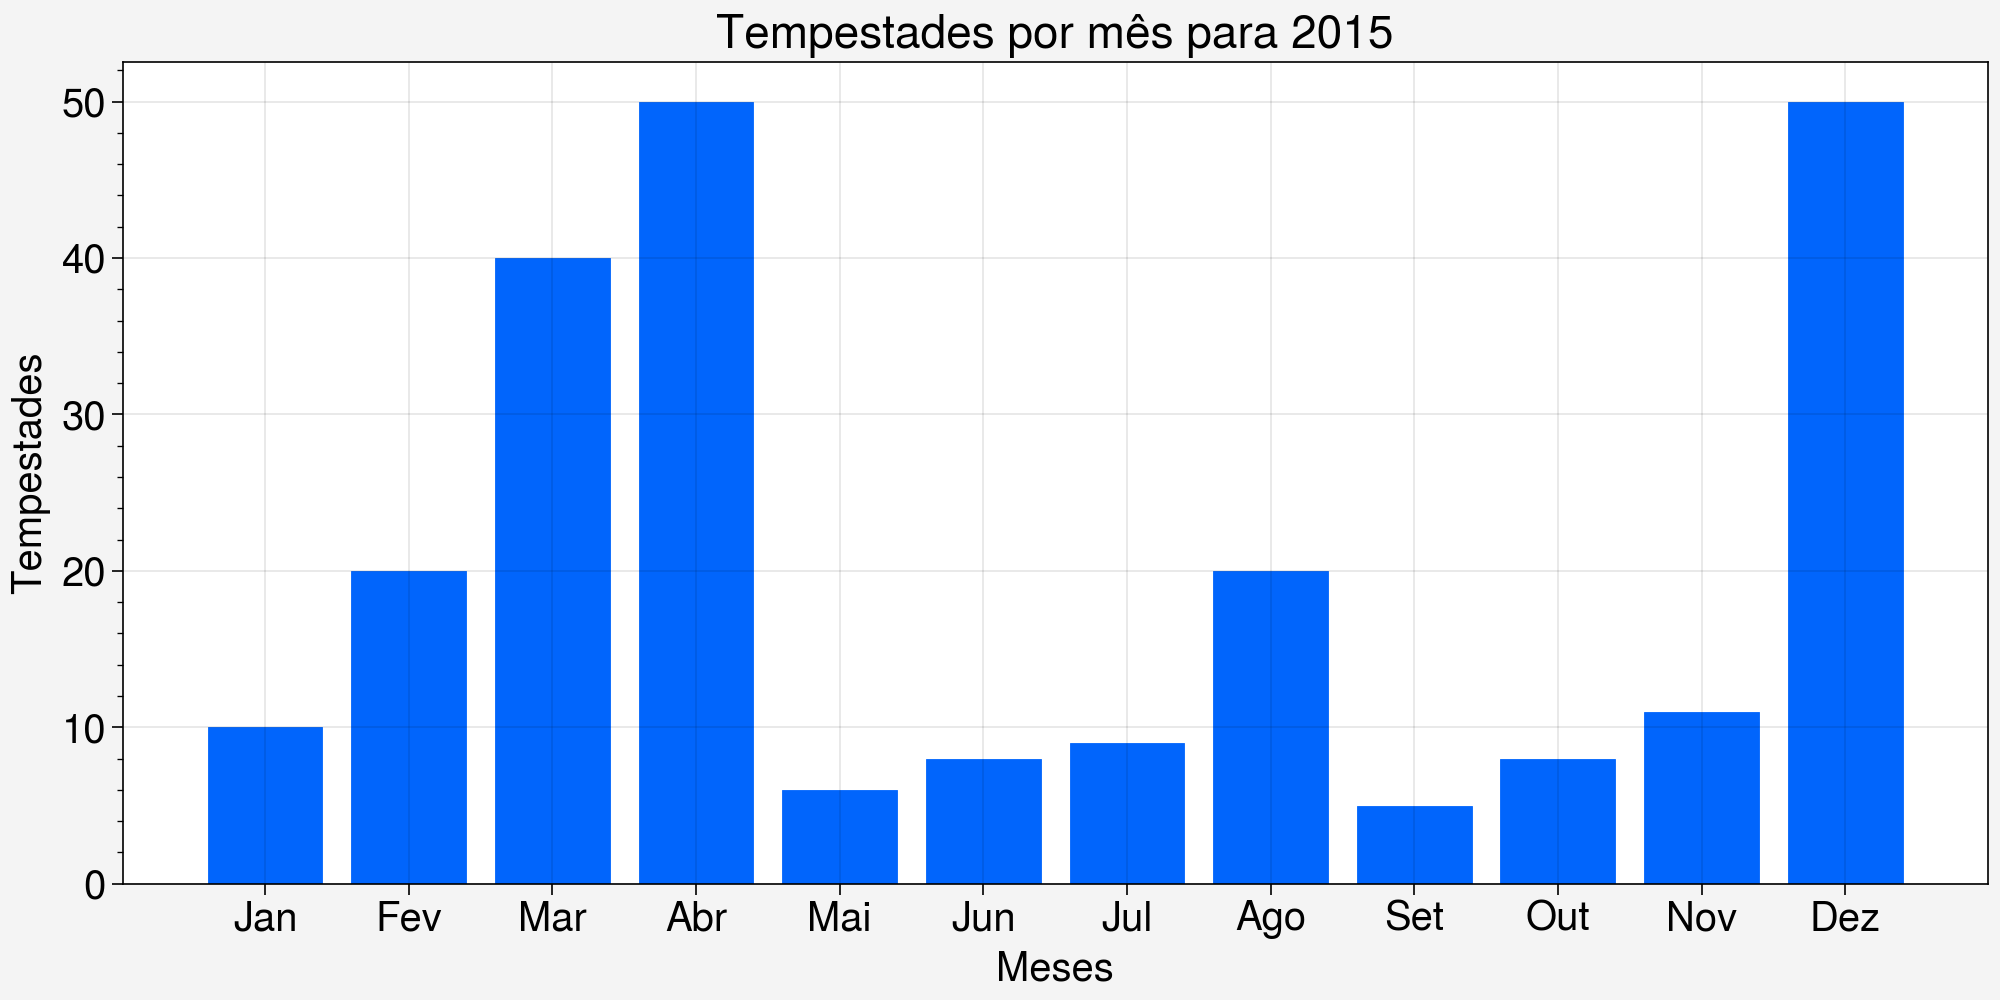

In [27]:
# cria a moldura da figura
fig, ax = plot.subplots(figsize=(10, 5), tight=True)

# plota o gráfico em forma de barras
ax.bar(mes,
       qte_por_mes,
       color='bright blue')

# formato dos eixos X e Y
ax.format(xlabel='Meses',
          ylabel='Tempestades',
          title='Tempestades por mês para 2015',
          small='20px',
          large='23px',
          xrotation=0,
          xtickminor=False)

# salva figura
fig.save(f'{dir}output/Fig_1_mensal_tempestades.jpg', dpi=300, bbox_inches='tight')

# exibe na tela
plot.show()

# **PARTE 2):**
**ENUNCIADO**: Baseado nos dados da $\underline{questão \ 1)}$ determine a quantidade e a **porcentagem relativa** de tempestades que ocorreram em cada estação do ano: i) verão (dez, jan, fev), ii) outono (mar, abr, mai), iii) inverno (jun, jul, ago) e iv) primavera (set, out, nov). A partir da porcentagem relativa calculada, descreva em qual estação do ano ocorre o mínimo e máximo de tempestades e justifique sua resposta.

**Visualizando a variável que possui a quantidade de tempestades por mês: `qte_por_mes`**

In [10]:
qte_por_mes

[10, 20, 40, 50, 6, 8, 9, 20, 5, 8, 11, 50]

**### ALUNO - FAZER AS MUDANÇAS AQUI ###:** Somando as tempestades para cada estação do ano

In [11]:
# índices referente a cada mês
#janeiro: 0
#fevereiro: 1
#março: 2
#abril: 3
#maio: 4
#junho: 5
#julho: 6
#agosto: 7
#setembro: 8
#outubro: 9
#novembro: 10
#dezembro: 11

verao = qte_por_mes[0] + qte_por_mes[10] + qte_por_mes[11]
#outono =      # alunos: preencher
#inverno =     # alunos: preencher
#primavera =   # alunos: preencher

**Somando o total de tempestades no ano todo**

In [ ]:
total = verao + outono + primavera + inverno

**### ALUNO - FAZER AS MUDANÇAS AQUI ###:** Calculando a porcentagem relativa (%) das tempestades para cada estação do ano**

In [ ]:
verao_em_porcentagem = (verao/total)*100.
#outono_em_porcentagem =      # alunos: preencher
#inverno_em_porcentagem =     # alunos: preencher
#primavera_em_porcentagem =   # alunos: preencher

In [ ]:
print(verao_em_porcentagem)
print(outono_em_porcentagem)
print(inverno_em_porcentagem)
print(primavera_em_porcentagem)

# **PARTE 3):**
**ENUNCIADO**: Plote o ciclo **diurno** para um determinado mês de 2015 do nascimento de tempestades para a região Sudeste num gráfico de linha. Utilize as planilhas excel de ciclo diurno de tempestades. Descreva em qual horário do dia (UTC e Hora local) ocorre o máximo e mínimo de nascimento de tempestade e explique por que. Insira junto à resposta o gráfico que foi produzido.  

##**a) ### ALUNO - FAZER AS MUDANÇAS AQUI ###:** Escolha o mês

In [28]:
mes = '01'

## **b) Lendo o dado**

In [29]:
# leitura do arquivo
df = pd.read_excel(f'{dir}input/diurno_15{mes}.xlsx')

In [30]:
# exibe a tabela dos dados
df

,HORA,MINU,DURACAO
0,0,30,2.0
1,0,30,3.0
2,0,0,4.5
3,0,30,1.0
4,0,0,1.0
...,...,...,...
258,23,30,1.0
259,23,30,1.5
260,23,0,1.0
261,23,0,1.5


## **c) Analisando o dado**

**Visualizando o dado**

In [31]:
df.head()

,HORA,MINU,DURACAO
0,0,30,2.0
1,0,30,3.0
2,0,0,4.5
3,0,30,1.0
4,0,0,1.0


**Agrupando o dado por hora**

In [32]:
grupo_por_hora = df.groupby('HORA').count()['DURACAO']
grupo_por_hora

HORA
0     15
1     14
2     14
3      6
4      8
5      5
6      6
7      9
8      3
9      2
10     3
11     3
12     2
13     3
14     3
15     5
16    18
17    27
18    29
19    24
20    22
21    21
22    14
23     7
Name: DURACAO, dtype: int64

**Mostrando os índices da variável**

In [33]:
horas = grupo_por_hora.index
horas

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='HORA')

**Mostrando os valores da variável**

In [34]:
qte = grupo_por_hora.values
qte

array([15, 14, 14,  6,  8,  5,  6,  9,  3,  2,  3,  3,  2,  3,  3,  5, 18,
       27, 29, 24, 22, 21, 14,  7])

## **d) Gerando a figura**

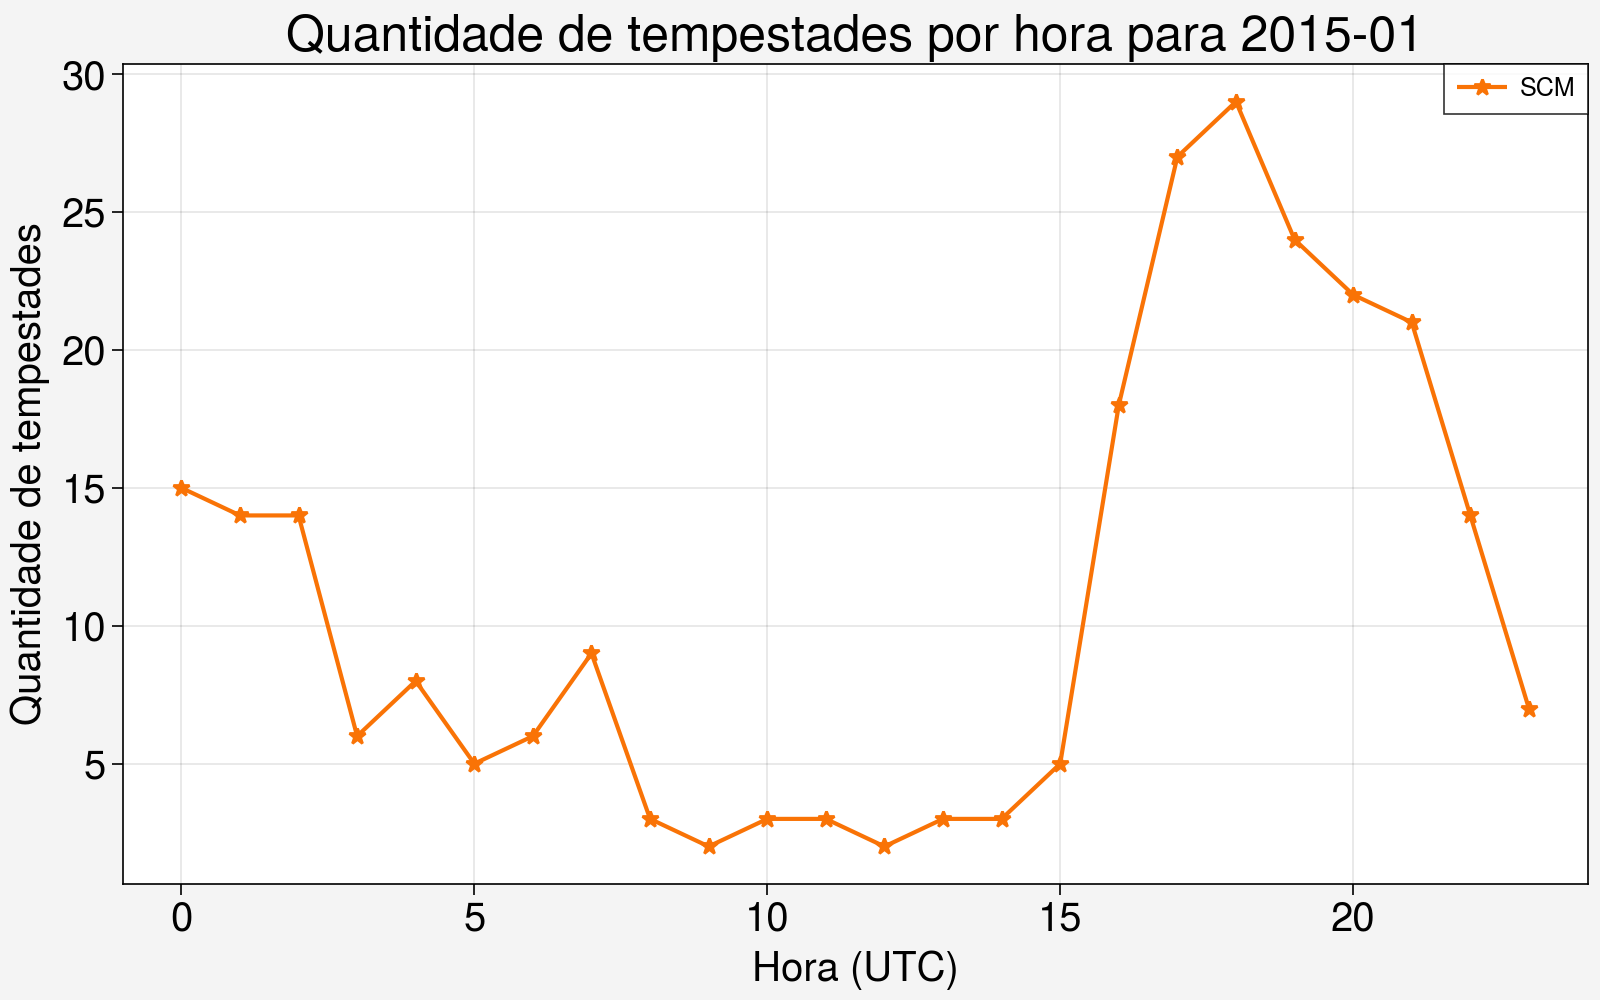

In [35]:
# cria a moldura da figura
fig, ax = plot.subplots(figsize=(8, 5), tight=True)

# plota gráfico de linha
ax.plot(horas,
        qte,
        color='orange',
        marker='*',
        label='SCM')

# formatação de eixos etc
ax.format(xlabel='Hora (UTC)',
          ylabel='Quantidade de tempestades',
          title=f'Quantidade de tempestades por hora para 2015-{mes}',
          xtickminor=False,
          ytickminor=False,
          small='20px', large='25px',
          xlim=(-1, 24))

# Adiona a legenda
ax.legend()

# salva figura
fig.save(f'{dir}output/Fig_2_diurno_tempestades_mes{mes}.jpg', dpi=300, bbox_inches='tight')

# exibe na tela
plot.show()

# **PARTE 4):**
**ENUNCIADO**: Plote a evolução da **área** média $(km^2)$ ao longo do ciclo de vida das tempestades com duração de 2 e 4 horas que ocorreram no mês de janeiro de 2015 num gráfico de linha para a região Sudeste. Utilize as planilhas excel do ciclo de vida das tempestades. A partir do gráfico gerado discuta:

 1. O que acontece com o tamanho máximo (maturação) das tempestades quando se aumenta a duração? Justifique sua resposta.

 2. Qual dos dois grupos de tempestades (de 2 ou 4 horas) possui a maior variação da área nos instantes iniciais do ciclo de vida e por quê? Qual aplicação na meteorologia poderia ser produzida a partir deste resultado?  

## **a) Lendo o dado**

In [36]:
# Arquivo de 2h
df_2h = pd.read_excel(f'{dir}input/lifecycle_size_2h_15{mes}.xlsx')

In [37]:
# mostra a tabela
df_2h

,Unnamed: 0,TAMANHO DAS TEMPESTADE EM PIXELS,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,HORAS,TEMPESTADE 1,TEMPESTADE 2,TEMPESTADE 3,TEMPESTADE 4,TEMPESTADE 5,TEMPESTADE 6,TEMPESTADE 7,TEMPESTADE 8,TEMPESTADE 9,...,TEMPESTADE 30,TEMPESTADE 31,TEMPESTADE 32,TEMPESTADE 33,TEMPESTADE 34,TEMPESTADE 35,TEMPESTADE 36,TEMPESTADE 37,MÉDIA (PIXELS),MÉDIA (KM2)
1,0.0,248,157,98,176,91,114,114,106,111,...,110,149,150,111,223,178,110,96,NaN,NaN
2,0.5,340,297,282,217,177,236,146,222,162,...,113,176,222,154,314,253,145,154,NaN,NaN
3,1.0,416,270,324,232,196,380,164,244,189,...,171,116,237,172,384,264,118,215,NaN,NaN
4,1.5,459,201,306,173,200,298,234,210,180,...,143,218,151,168,375,212,108,146,NaN,NaN
5,2.0,401,113,218,143,125,124,178,156,129,...,96,91,109,114,335,130,107,112,NaN,NaN


In [38]:
# Arquivo de 4h
df_4h = pd.read_excel(f'{dir}input/lifecycle_size_4h_15{mes}.xlsx')

In [39]:
# mostra a tabela
df_4h

,Unnamed: 0,TAMANHO DAS TEMPESTADES EM PIXELS,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,HORAS,TEMPESTADE 1,TEMPESTADE 2,TEMPESTADE 3,TEMPESTADE 4,TEMPESTADE 5,TEMPESTADE 6,TEMPESTADE 7,TEMPESTADE 8,TEMPESTADE 9,TEMPESTADE 10,TEMPESTADE 11,MÉDIA (PIXELS),MÉDIA (KM2)
1,0.0,115,102,160,131,110,126,125,102,102,189,191,NaN,NaN
2,0.5,233,174,276,234,242,187,131,124,226,249,265,NaN,NaN
3,1.0,332,259,382,382,514,150,129,352,207,317,392,NaN,NaN
4,1.5,436,369,542,514,741,154,150,452,234,381,600,NaN,NaN
5,2.0,494,456,613,578,800,182,137,453,263,466,682,NaN,NaN
6,2.5,532,481,642,527,946,203,255,451,259,433,670,NaN,NaN
7,3.0,453,327,583,415,762,185,248,387,244,333,593,NaN,NaN
8,3.5,301,216,330,320,465,173,282,352,185,151,500,NaN,NaN
9,4.0,182,145,153,176,235,125,225,273,110,147,370,NaN,NaN


## **b) Analisando o dado**

**Visualizando a tabela**

In [40]:
df_2h

,Unnamed: 0,TAMANHO DAS TEMPESTADE EM PIXELS,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,HORAS,TEMPESTADE 1,TEMPESTADE 2,TEMPESTADE 3,TEMPESTADE 4,TEMPESTADE 5,TEMPESTADE 6,TEMPESTADE 7,TEMPESTADE 8,TEMPESTADE 9,...,TEMPESTADE 30,TEMPESTADE 31,TEMPESTADE 32,TEMPESTADE 33,TEMPESTADE 34,TEMPESTADE 35,TEMPESTADE 36,TEMPESTADE 37,MÉDIA (PIXELS),MÉDIA (KM2)
1,0.0,248,157,98,176,91,114,114,106,111,...,110,149,150,111,223,178,110,96,NaN,NaN
2,0.5,340,297,282,217,177,236,146,222,162,...,113,176,222,154,314,253,145,154,NaN,NaN
3,1.0,416,270,324,232,196,380,164,244,189,...,171,116,237,172,384,264,118,215,NaN,NaN
4,1.5,459,201,306,173,200,298,234,210,180,...,143,218,151,168,375,212,108,146,NaN,NaN
5,2.0,401,113,218,143,125,124,178,156,129,...,96,91,109,114,335,130,107,112,NaN,NaN


**Renomeando o nome das colunas**

In [41]:
 df_2h.iloc[0].values

array(['HORAS', 'TEMPESTADE 1 ', 'TEMPESTADE 2', 'TEMPESTADE 3',
       'TEMPESTADE 4', 'TEMPESTADE 5', 'TEMPESTADE 6', 'TEMPESTADE 7',
       'TEMPESTADE 8', 'TEMPESTADE 9', 'TEMPESTADE 10', 'TEMPESTADE 11',
       'TEMPESTADE 12', 'TEMPESTADE 13', 'TEMPESTADE 14', 'TEMPESTADE 15',
       'TEMPESTADE 16', 'TEMPESTADE 17', 'TEMPESTADE 18', 'TEMPESTADE 19',
       'TEMPESTADE 20', 'TEMPESTADE 21', 'TEMPESTADE 22', 'TEMPESTADE 23',
       'TEMPESTADE 24', 'TEMPESTADE 25', 'TEMPESTADE 26', 'TEMPESTADE 27',
       'TEMPESTADE 28', 'TEMPESTADE 29', 'TEMPESTADE 30', 'TEMPESTADE 31',
       'TEMPESTADE 32', 'TEMPESTADE 33', 'TEMPESTADE 34', 'TEMPESTADE 35',
       'TEMPESTADE 36', 'TEMPESTADE 37', 'MÉDIA (PIXELS)', 'MÉDIA (KM2)'],
      dtype=object)

In [42]:
df_2h.columns = df_2h.iloc[0].values
df_2h

,HORAS,TEMPESTADE 1,TEMPESTADE 2,TEMPESTADE 3,TEMPESTADE 4,TEMPESTADE 5,TEMPESTADE 6,TEMPESTADE 7,TEMPESTADE 8,TEMPESTADE 9,...,TEMPESTADE 30,TEMPESTADE 31,TEMPESTADE 32,TEMPESTADE 33,TEMPESTADE 34,TEMPESTADE 35,TEMPESTADE 36,TEMPESTADE 37,MÉDIA (PIXELS),MÉDIA (KM2)
0,HORAS,TEMPESTADE 1,TEMPESTADE 2,TEMPESTADE 3,TEMPESTADE 4,TEMPESTADE 5,TEMPESTADE 6,TEMPESTADE 7,TEMPESTADE 8,TEMPESTADE 9,...,TEMPESTADE 30,TEMPESTADE 31,TEMPESTADE 32,TEMPESTADE 33,TEMPESTADE 34,TEMPESTADE 35,TEMPESTADE 36,TEMPESTADE 37,MÉDIA (PIXELS),MÉDIA (KM2)
1,0.0,248,157,98,176,91,114,114,106,111,...,110,149,150,111,223,178,110,96,NaN,NaN
2,0.5,340,297,282,217,177,236,146,222,162,...,113,176,222,154,314,253,145,154,NaN,NaN
3,1.0,416,270,324,232,196,380,164,244,189,...,171,116,237,172,384,264,118,215,NaN,NaN
4,1.5,459,201,306,173,200,298,234,210,180,...,143,218,151,168,375,212,108,146,NaN,NaN
5,2.0,401,113,218,143,125,124,178,156,129,...,96,91,109,114,335,130,107,112,NaN,NaN


**Eliminando a primeira linha da tabela**

In [43]:
df_2h.drop(df_2h.index[[0]], inplace=True)
df_2h

,HORAS,TEMPESTADE 1,TEMPESTADE 2,TEMPESTADE 3,TEMPESTADE 4,TEMPESTADE 5,TEMPESTADE 6,TEMPESTADE 7,TEMPESTADE 8,TEMPESTADE 9,...,TEMPESTADE 30,TEMPESTADE 31,TEMPESTADE 32,TEMPESTADE 33,TEMPESTADE 34,TEMPESTADE 35,TEMPESTADE 36,TEMPESTADE 37,MÉDIA (PIXELS),MÉDIA (KM2)
1,0.0,248,157,98,176,91,114,114,106,111,...,110,149,150,111,223,178,110,96,NaN,NaN
2,0.5,340,297,282,217,177,236,146,222,162,...,113,176,222,154,314,253,145,154,NaN,NaN
3,1.0,416,270,324,232,196,380,164,244,189,...,171,116,237,172,384,264,118,215,NaN,NaN
4,1.5,459,201,306,173,200,298,234,210,180,...,143,218,151,168,375,212,108,146,NaN,NaN
5,2.0,401,113,218,143,125,124,178,156,129,...,96,91,109,114,335,130,107,112,NaN,NaN


**Fazendo o mesmo procedimento para a tabela de 4 h**

In [44]:
df_4h.columns = df_4h.iloc[0].values
df_4h.drop(df_4h.index[[0]], inplace=True)
df_4h

,HORAS,TEMPESTADE 1,TEMPESTADE 2,TEMPESTADE 3,TEMPESTADE 4,TEMPESTADE 5,TEMPESTADE 6,TEMPESTADE 7,TEMPESTADE 8,TEMPESTADE 9,TEMPESTADE 10,TEMPESTADE 11,MÉDIA (PIXELS),MÉDIA (KM2)
1,0.0,115,102,160,131,110,126,125,102,102,189,191,NaN,NaN
2,0.5,233,174,276,234,242,187,131,124,226,249,265,NaN,NaN
3,1.0,332,259,382,382,514,150,129,352,207,317,392,NaN,NaN
4,1.5,436,369,542,514,741,154,150,452,234,381,600,NaN,NaN
5,2.0,494,456,613,578,800,182,137,453,263,466,682,NaN,NaN
6,2.5,532,481,642,527,946,203,255,451,259,433,670,NaN,NaN
7,3.0,453,327,583,415,762,185,248,387,244,333,593,NaN,NaN
8,3.5,301,216,330,320,465,173,282,352,185,151,500,NaN,NaN
9,4.0,182,145,153,176,235,125,225,273,110,147,370,NaN,NaN


**Transformando o dado da tabela para número em format real e inteiro**

In [45]:
df_2h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 1 to 5
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   HORAS           5 non-null      object
 1   TEMPESTADE 1    5 non-null      object
 2   TEMPESTADE 2    5 non-null      object
 3   TEMPESTADE 3    5 non-null      object
 4   TEMPESTADE 4    5 non-null      object
 5   TEMPESTADE 5    5 non-null      object
 6   TEMPESTADE 6    5 non-null      object
 7   TEMPESTADE 7    5 non-null      object
 8   TEMPESTADE 8    5 non-null      object
 9   TEMPESTADE 9    5 non-null      object
 10  TEMPESTADE 10   5 non-null      object
 11  TEMPESTADE 11   5 non-null      object
 12  TEMPESTADE 12   5 non-null      object
 13  TEMPESTADE 13   5 non-null      object
 14  TEMPESTADE 14   5 non-null      object
 15  TEMPESTADE 15   5 non-null      object
 16  TEMPESTADE 16   5 non-null      object
 17  TEMPESTADE 17   5 non-null      object
 18  TEMPESTADE 18 

In [46]:
df_2h = df_2h.apply(pd.to_numeric, errors='coerce')

In [47]:
df_2h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 1 to 5
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HORAS           5 non-null      float64
 1   TEMPESTADE 1    5 non-null      int64  
 2   TEMPESTADE 2    5 non-null      int64  
 3   TEMPESTADE 3    5 non-null      int64  
 4   TEMPESTADE 4    5 non-null      int64  
 5   TEMPESTADE 5    5 non-null      int64  
 6   TEMPESTADE 6    5 non-null      int64  
 7   TEMPESTADE 7    5 non-null      int64  
 8   TEMPESTADE 8    5 non-null      int64  
 9   TEMPESTADE 9    5 non-null      int64  
 10  TEMPESTADE 10   5 non-null      int64  
 11  TEMPESTADE 11   5 non-null      int64  
 12  TEMPESTADE 12   5 non-null      int64  
 13  TEMPESTADE 13   5 non-null      int64  
 14  TEMPESTADE 14   5 non-null      int64  
 15  TEMPESTADE 15   5 non-null      int64  
 16  TEMPESTADE 16   5 non-null      int64  
 17  TEMPESTADE 17   5 non-null      int64  

In [48]:
df_2h

,HORAS,TEMPESTADE 1,TEMPESTADE 2,TEMPESTADE 3,TEMPESTADE 4,TEMPESTADE 5,TEMPESTADE 6,TEMPESTADE 7,TEMPESTADE 8,TEMPESTADE 9,...,TEMPESTADE 30,TEMPESTADE 31,TEMPESTADE 32,TEMPESTADE 33,TEMPESTADE 34,TEMPESTADE 35,TEMPESTADE 36,TEMPESTADE 37,MÉDIA (PIXELS),MÉDIA (KM2)
1,0.0,248,157,98,176,91,114,114,106,111,...,110,149,150,111,223,178,110,96,NaN,NaN
2,0.5,340,297,282,217,177,236,146,222,162,...,113,176,222,154,314,253,145,154,NaN,NaN
3,1.0,416,270,324,232,196,380,164,244,189,...,171,116,237,172,384,264,118,215,NaN,NaN
4,1.5,459,201,306,173,200,298,234,210,180,...,143,218,151,168,375,212,108,146,NaN,NaN
5,2.0,401,113,218,143,125,124,178,156,129,...,96,91,109,114,335,130,107,112,NaN,NaN


**Calculando o valor médio do tamanho em pixels das tempestades**

In [49]:
df_2h['MÉDIA (PIXELS)'] = df_2h.mean(axis=1)
df_2h

,HORAS,TEMPESTADE 1,TEMPESTADE 2,TEMPESTADE 3,TEMPESTADE 4,TEMPESTADE 5,TEMPESTADE 6,TEMPESTADE 7,TEMPESTADE 8,TEMPESTADE 9,...,TEMPESTADE 30,TEMPESTADE 31,TEMPESTADE 32,TEMPESTADE 33,TEMPESTADE 34,TEMPESTADE 35,TEMPESTADE 36,TEMPESTADE 37,MÉDIA (PIXELS),MÉDIA (KM2)
1,0.0,248,157,98,176,91,114,114,106,111,...,110,149,150,111,223,178,110,96,129.657895,NaN
2,0.5,340,297,282,217,177,236,146,222,162,...,113,176,222,154,314,253,145,154,191.881579,NaN
3,1.0,416,270,324,232,196,380,164,244,189,...,171,116,237,172,384,264,118,215,220.421053,NaN
4,1.5,459,201,306,173,200,298,234,210,180,...,143,218,151,168,375,212,108,146,203.118421,NaN
5,2.0,401,113,218,143,125,124,178,156,129,...,96,91,109,114,335,130,107,112,141.052632,NaN


**Transformando o valor médio do tamanho em pixels em km$^{2}$:** como 1 pixel tem área de 16 km$^{2}$, basta multiplicar a quantidade de pixels por 16.

In [50]:
 df_2h['MÉDIA (KM2)'] = df_2h['MÉDIA (PIXELS)']*16.
 df_2h

,HORAS,TEMPESTADE 1,TEMPESTADE 2,TEMPESTADE 3,TEMPESTADE 4,TEMPESTADE 5,TEMPESTADE 6,TEMPESTADE 7,TEMPESTADE 8,TEMPESTADE 9,...,TEMPESTADE 30,TEMPESTADE 31,TEMPESTADE 32,TEMPESTADE 33,TEMPESTADE 34,TEMPESTADE 35,TEMPESTADE 36,TEMPESTADE 37,MÉDIA (PIXELS),MÉDIA (KM2)
1,0.0,248,157,98,176,91,114,114,106,111,...,110,149,150,111,223,178,110,96,129.657895,2074.526316
2,0.5,340,297,282,217,177,236,146,222,162,...,113,176,222,154,314,253,145,154,191.881579,3070.105263
3,1.0,416,270,324,232,196,380,164,244,189,...,171,116,237,172,384,264,118,215,220.421053,3526.736842
4,1.5,459,201,306,173,200,298,234,210,180,...,143,218,151,168,375,212,108,146,203.118421,3249.894737
5,2.0,401,113,218,143,125,124,178,156,129,...,96,91,109,114,335,130,107,112,141.052632,2256.842105


**Aplica os mesmos procedimentos anteriores, agora para as tempestades com 4 h de duração**

In [51]:
df_4h = df_4h.apply(pd.to_numeric, errors='coerce')
df_4h['MÉDIA (PIXELS)'] = df_4h.mean(axis=1)
df_4h['MÉDIA (KM2)'] = df_4h['MÉDIA (PIXELS)']*16.
df_4h

,HORAS,TEMPESTADE 1,TEMPESTADE 2,TEMPESTADE 3,TEMPESTADE 4,TEMPESTADE 5,TEMPESTADE 6,TEMPESTADE 7,TEMPESTADE 8,TEMPESTADE 9,TEMPESTADE 10,TEMPESTADE 11,MÉDIA (PIXELS),MÉDIA (KM2)
1,0.0,115,102,160,131,110,126,125,102,102,189,191,121.083333,1937.333333
2,0.5,233,174,276,234,242,187,131,124,226,249,265,195.125000,3122.000000
3,1.0,332,259,382,382,514,150,129,352,207,317,392,284.750000,4556.000000
4,1.5,436,369,542,514,741,154,150,452,234,381,600,381.208333,6099.333333
5,2.0,494,456,613,578,800,182,137,453,263,466,682,427.166667,6834.666667
6,2.5,532,481,642,527,946,203,255,451,259,433,670,450.125000,7202.000000
7,3.0,453,327,583,415,762,185,248,387,244,333,593,377.750000,6044.000000
8,3.5,301,216,330,320,465,173,282,352,185,151,500,273.208333,4371.333333
9,4.0,182,145,153,176,235,125,225,273,110,147,370,178.750000,2860.000000


## **c) Gerando a figura**

**Mostrando os valores da variável `df_2H['HORAS]`**

In [52]:
df_2h['HORAS'].values

array([0. , 0.5, 1. , 1.5, 2. ])

**Mostrando os valores da variável `df_2H['MÉDIA (KM2)]`**

In [53]:
df_2h['MÉDIA (KM2)'].values

array([2074.52631579, 3070.10526316, 3526.73684211, 3249.89473684,
       2256.84210526])

**Mostrando os valores da variável `df_4H['HORAS]`**

In [54]:
df_4h['HORAS'].values

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

**Mostrando os valores da variável `df_4H['MÉDIA (KM2)]`**

In [55]:
df_4h['MÉDIA (KM2)'].values

array([1937.33333333, 3122.        , 4556.        , 6099.33333333,
       6834.66666667, 7202.        , 6044.        , 4371.33333333,
       2860.        ])

**Plotando a figura**

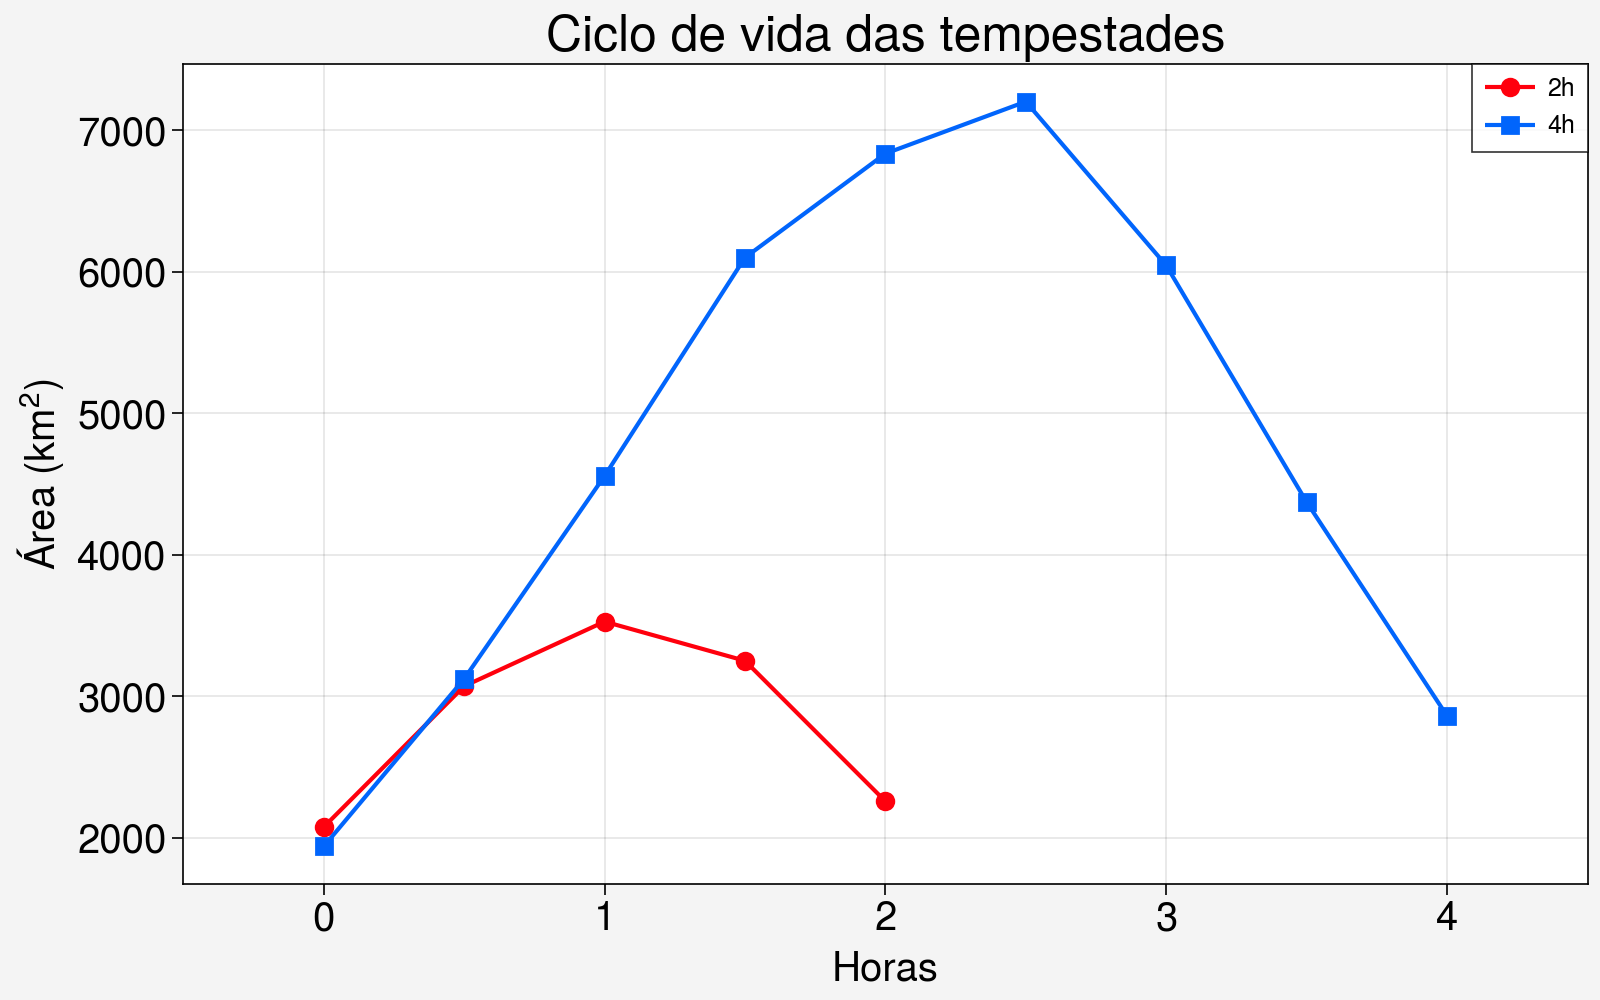

In [56]:
# cria a moldura da figura
fig, ax = plot.subplots(figsize=(8, 5), tight=True)

# plota gráfico de linha
ax.plot(df_2h['HORAS'].values, df_2h['MÉDIA (KM2)'].values, color='bright red', marker='o', label='2h')
ax.plot(df_4h['HORAS'].values, df_4h['MÉDIA (KM2)'].values, color='bright blue', marker='s', label='4h')

# formatação de eixos etc
ax.format(xlabel='Horas',
          ylabel='Área $(km^{2})$',
          title='Ciclo de vida das tempestades',
          xtickminor=False,
          ytickminor=False,
          small='20px',
          large='25px',
          xlim=(-0.5, 4.5))

# adiciona a legenda
ax.legend(ncols=1)

# salva figura
fig.save(f'{dir}output/Fig_3_ciclovida_area_tempestades.jpg', dpi=300, bbox_inches='tight')

# exibe na tela
plot.show()

# **PARTE 5):**
- **ENUNCIADO**: Plote a evolução da **temperatura** média $(^oC)$ ao longo do ciclo de vida das tempestades com duração de 2 e 4 horas que ocorreram no mês de janeiro num gráfico de linha para a região Sudeste. Utilize as planilhas excel do ciclo de vida das tempestades. Qual dos dois grupos de tempestades (de 2 ou 4 horas) apresentou a menor temperatura ao longo do ciclo de vida? Justifique sua resposta.

## **a) Lendo o dado**

In [57]:
# Arquivo de 2h
df_2h = pd.read_excel(f'{dir}input/lifecycle_tmin9_2h_15{mes}.xlsx')

In [58]:
# mostrando a tabela
df_2h

,Unnamed: 0,TEMPERATURA DAS TEMPESTADES EM KELVIN,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,HORAS,TEMPESTADE 1,TEMPESTADE 2,TEMPESTADE 3,TEMPESTADE 4,TEMPESTADE 5,TEMPESTADE 6,TEMPESTADE 7,TEMPESTADE 8,TEMPESTADE 9,...,TEMPESTADE 30,TEMPESTADE 31,TEMPESTADE 32,TEMPESTADE 33,TEMPESTADE 34,TEMPESTADE 35,TEMPESTADE 36,TEMPESTADE 37,MEDIA (K),MEDIA (CELSIUS)
1,0,216.7,210.4,211.3,208.2,222,219.9,212.2,217.8,220.7,...,228,229,214.9,221.3,212,214.4,212.3,220,NaN,NaN
2,0.5,213.2,210.7,211.4,208.4,217.8,218.4,212.3,214.4,215.7,...,226.7,227.8,214,217.6,209.8,220.2,212.1,219.6,NaN,NaN
3,1,220.4,209.6,212.9,208.6,220.9,216.1,215.4,216.9,215.8,...,225.7,229.3,220,216,212,215,214,215.7,NaN,NaN
4,1.5,222.8,212.8,216.1,215.3,221.4,222,221.3,220.2,219,...,226.4,227.9,224.2,216,215.1,218.7,217.3,216.2,NaN,NaN
5,2,225.2,219.1,221.1,221.3,226.3,228.4,225.6,214.9,224.3,...,228.9,226.9,227.4,218.8,219,222,222.6,218.4,NaN,NaN


In [59]:
# Arquivo de 4h
df_4h = pd.read_excel(f'{dir}input/lifecycle_tmin9_4h_15{mes}.xlsx')

In [60]:
# mostrando a tabela
df_4h

,Unnamed: 0,TEMPERATURA DAS TEMPESTADES EM KELVIN,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,HORAS,TEMPESTADE 1,TEMPESTADE 2,TEMPESTADE 3,TEMPESTADE 4,TEMPESTADE 5,TEMPESTADE 6,TEMPESTADE 7,TEMPESTADE 8,TEMPESTADE 9,TEMPESTADE 10,TEMPESTADE 11,MEDIA (K),MÉDIA (CELSIUS)
1,0,208.6,220.2,224.7,221.2,217.6,226.6,214.7,221.6,224.9,209,214.2,NaN,NaN
2,0.5,207.2,211.3,224,220.1,211.6,224.7,214,220.8,224,207.7,213.9,NaN,NaN
3,1,206.8,213.6,219.9,212.1,208,227.2,214.9,215.2,221.6,206,207.1,NaN,NaN
4,1.5,207.3,212.8,217.2,216.2,206.8,227.4,215.3,217,221.6,207.3,206.2,NaN,NaN
5,2,204.1,211.2,217.9,215.4,209,227.8,219,216,218.9,205,207.1,NaN,NaN
6,2.5,205.7,212.2,218.4,217.9,210.8,224.1,220.3,218,218.4,207,208.1,NaN,NaN
7,3,208.9,217.8,221.3,218.9,215.8,225.6,223.1,216.6,218.7,210.7,212.1,NaN,NaN
8,3.5,215.3,221.7,222.8,220.4,220,223.8,227.6,219.2,220.4,214.4,216.4,NaN,NaN
9,4,221,227.8,225.6,228.1,227.6,224.3,225,227.2,223.8,218.6,221,NaN,NaN


## **b) Analisando o dado**

**Visualizando a tabela**

In [61]:
df_2h

,Unnamed: 0,TEMPERATURA DAS TEMPESTADES EM KELVIN,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,HORAS,TEMPESTADE 1,TEMPESTADE 2,TEMPESTADE 3,TEMPESTADE 4,TEMPESTADE 5,TEMPESTADE 6,TEMPESTADE 7,TEMPESTADE 8,TEMPESTADE 9,...,TEMPESTADE 30,TEMPESTADE 31,TEMPESTADE 32,TEMPESTADE 33,TEMPESTADE 34,TEMPESTADE 35,TEMPESTADE 36,TEMPESTADE 37,MEDIA (K),MEDIA (CELSIUS)
1,0,216.7,210.4,211.3,208.2,222,219.9,212.2,217.8,220.7,...,228,229,214.9,221.3,212,214.4,212.3,220,NaN,NaN
2,0.5,213.2,210.7,211.4,208.4,217.8,218.4,212.3,214.4,215.7,...,226.7,227.8,214,217.6,209.8,220.2,212.1,219.6,NaN,NaN
3,1,220.4,209.6,212.9,208.6,220.9,216.1,215.4,216.9,215.8,...,225.7,229.3,220,216,212,215,214,215.7,NaN,NaN
4,1.5,222.8,212.8,216.1,215.3,221.4,222,221.3,220.2,219,...,226.4,227.9,224.2,216,215.1,218.7,217.3,216.2,NaN,NaN
5,2,225.2,219.1,221.1,221.3,226.3,228.4,225.6,214.9,224.3,...,228.9,226.9,227.4,218.8,219,222,222.6,218.4,NaN,NaN


**Renomeando o nome das colunas**

In [62]:
df_2h.columns = df_2h.iloc[0].values
df_2h

,HORAS,TEMPESTADE 1,TEMPESTADE 2,TEMPESTADE 3,TEMPESTADE 4,TEMPESTADE 5,TEMPESTADE 6,TEMPESTADE 7,TEMPESTADE 8,TEMPESTADE 9,...,TEMPESTADE 30,TEMPESTADE 31,TEMPESTADE 32,TEMPESTADE 33,TEMPESTADE 34,TEMPESTADE 35,TEMPESTADE 36,TEMPESTADE 37,MEDIA (K),MEDIA (CELSIUS)
0,HORAS,TEMPESTADE 1,TEMPESTADE 2,TEMPESTADE 3,TEMPESTADE 4,TEMPESTADE 5,TEMPESTADE 6,TEMPESTADE 7,TEMPESTADE 8,TEMPESTADE 9,...,TEMPESTADE 30,TEMPESTADE 31,TEMPESTADE 32,TEMPESTADE 33,TEMPESTADE 34,TEMPESTADE 35,TEMPESTADE 36,TEMPESTADE 37,MEDIA (K),MEDIA (CELSIUS)
1,0,216.7,210.4,211.3,208.2,222,219.9,212.2,217.8,220.7,...,228,229,214.9,221.3,212,214.4,212.3,220,NaN,NaN
2,0.5,213.2,210.7,211.4,208.4,217.8,218.4,212.3,214.4,215.7,...,226.7,227.8,214,217.6,209.8,220.2,212.1,219.6,NaN,NaN
3,1,220.4,209.6,212.9,208.6,220.9,216.1,215.4,216.9,215.8,...,225.7,229.3,220,216,212,215,214,215.7,NaN,NaN
4,1.5,222.8,212.8,216.1,215.3,221.4,222,221.3,220.2,219,...,226.4,227.9,224.2,216,215.1,218.7,217.3,216.2,NaN,NaN
5,2,225.2,219.1,221.1,221.3,226.3,228.4,225.6,214.9,224.3,...,228.9,226.9,227.4,218.8,219,222,222.6,218.4,NaN,NaN


**Eliminando a primeira linha da tabela**

In [63]:
df_2h.drop(df_2h.index[[0]], inplace=True)
df_2h

,HORAS,TEMPESTADE 1,TEMPESTADE 2,TEMPESTADE 3,TEMPESTADE 4,TEMPESTADE 5,TEMPESTADE 6,TEMPESTADE 7,TEMPESTADE 8,TEMPESTADE 9,...,TEMPESTADE 30,TEMPESTADE 31,TEMPESTADE 32,TEMPESTADE 33,TEMPESTADE 34,TEMPESTADE 35,TEMPESTADE 36,TEMPESTADE 37,MEDIA (K),MEDIA (CELSIUS)
1,0,216.7,210.4,211.3,208.2,222,219.9,212.2,217.8,220.7,...,228,229,214.9,221.3,212,214.4,212.3,220,NaN,NaN
2,0.5,213.2,210.7,211.4,208.4,217.8,218.4,212.3,214.4,215.7,...,226.7,227.8,214,217.6,209.8,220.2,212.1,219.6,NaN,NaN
3,1,220.4,209.6,212.9,208.6,220.9,216.1,215.4,216.9,215.8,...,225.7,229.3,220,216,212,215,214,215.7,NaN,NaN
4,1.5,222.8,212.8,216.1,215.3,221.4,222,221.3,220.2,219,...,226.4,227.9,224.2,216,215.1,218.7,217.3,216.2,NaN,NaN
5,2,225.2,219.1,221.1,221.3,226.3,228.4,225.6,214.9,224.3,...,228.9,226.9,227.4,218.8,219,222,222.6,218.4,NaN,NaN


**Fazendo o mesmo procedimento para a tabela de 4 h**

In [64]:
df_4h.columns = df_4h.iloc[0].values
df_4h.drop(df_4h.index[[0]], inplace=True)
df_4h

,HORAS,TEMPESTADE 1,TEMPESTADE 2,TEMPESTADE 3,TEMPESTADE 4,TEMPESTADE 5,TEMPESTADE 6,TEMPESTADE 7,TEMPESTADE 8,TEMPESTADE 9,TEMPESTADE 10,TEMPESTADE 11,MEDIA (K),MÉDIA (CELSIUS)
1,0,208.6,220.2,224.7,221.2,217.6,226.6,214.7,221.6,224.9,209,214.2,NaN,NaN
2,0.5,207.2,211.3,224,220.1,211.6,224.7,214,220.8,224,207.7,213.9,NaN,NaN
3,1,206.8,213.6,219.9,212.1,208,227.2,214.9,215.2,221.6,206,207.1,NaN,NaN
4,1.5,207.3,212.8,217.2,216.2,206.8,227.4,215.3,217,221.6,207.3,206.2,NaN,NaN
5,2,204.1,211.2,217.9,215.4,209,227.8,219,216,218.9,205,207.1,NaN,NaN
6,2.5,205.7,212.2,218.4,217.9,210.8,224.1,220.3,218,218.4,207,208.1,NaN,NaN
7,3,208.9,217.8,221.3,218.9,215.8,225.6,223.1,216.6,218.7,210.7,212.1,NaN,NaN
8,3.5,215.3,221.7,222.8,220.4,220,223.8,227.6,219.2,220.4,214.4,216.4,NaN,NaN
9,4,221,227.8,225.6,228.1,227.6,224.3,225,227.2,223.8,218.6,221,NaN,NaN


**Calculando a área média**

In [65]:
df_2h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 1 to 5
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HORAS            5 non-null      object
 1   TEMPESTADE 1     5 non-null      object
 2   TEMPESTADE 2     5 non-null      object
 3   TEMPESTADE 3     5 non-null      object
 4   TEMPESTADE 4     5 non-null      object
 5   TEMPESTADE 5     5 non-null      object
 6   TEMPESTADE 6     5 non-null      object
 7   TEMPESTADE 7     5 non-null      object
 8   TEMPESTADE 8     5 non-null      object
 9   TEMPESTADE 9     5 non-null      object
 10  TEMPESTADE 10    5 non-null      object
 11  TEMPESTADE 11    5 non-null      object
 12  TEMPESTADE 12    5 non-null      object
 13  TEMPESTADE 13    5 non-null      object
 14  TEMPESTADE 14    5 non-null      object
 15  TEMPESTADE 15    5 non-null      object
 16  TEMPESTADE 16    5 non-null      object
 17  TEMPESTADE 17    5 non-null      object

In [66]:
df_2h = df_2h.apply(pd.to_numeric, errors='coerce')

In [67]:
df_2h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 1 to 5
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HORAS            5 non-null      float64
 1   TEMPESTADE 1     5 non-null      float64
 2   TEMPESTADE 2     5 non-null      float64
 3   TEMPESTADE 3     5 non-null      float64
 4   TEMPESTADE 4     5 non-null      float64
 5   TEMPESTADE 5     5 non-null      float64
 6   TEMPESTADE 6     5 non-null      float64
 7   TEMPESTADE 7     5 non-null      float64
 8   TEMPESTADE 8     5 non-null      float64
 9   TEMPESTADE 9     5 non-null      float64
 10  TEMPESTADE 10    5 non-null      float64
 11  TEMPESTADE 11    5 non-null      float64
 12  TEMPESTADE 12    5 non-null      float64
 13  TEMPESTADE 13    5 non-null      float64
 14  TEMPESTADE 14    5 non-null      float64
 15  TEMPESTADE 15    5 non-null      float64
 16  TEMPESTADE 16    5 non-null      float64
 17  TEMPESTADE 17    5 n

In [68]:
df_2h

,HORAS,TEMPESTADE 1,TEMPESTADE 2,TEMPESTADE 3,TEMPESTADE 4,TEMPESTADE 5,TEMPESTADE 6,TEMPESTADE 7,TEMPESTADE 8,TEMPESTADE 9,...,TEMPESTADE 30,TEMPESTADE 31,TEMPESTADE 32,TEMPESTADE 33,TEMPESTADE 34,TEMPESTADE 35,TEMPESTADE 36,TEMPESTADE 37,MEDIA (K),MEDIA (CELSIUS)
1,0.0,216.7,210.4,211.3,208.2,222.0,219.9,212.2,217.8,220.7,...,228.0,229.0,214.9,221.3,212.0,214.4,212.3,220.0,NaN,NaN
2,0.5,213.2,210.7,211.4,208.4,217.8,218.4,212.3,214.4,215.7,...,226.7,227.8,214.0,217.6,209.8,220.2,212.1,219.6,NaN,NaN
3,1.0,220.4,209.6,212.9,208.6,220.9,216.1,215.4,216.9,215.8,...,225.7,229.3,220.0,216.0,212.0,215.0,214.0,215.7,NaN,NaN
4,1.5,222.8,212.8,216.1,215.3,221.4,222.0,221.3,220.2,219.0,...,226.4,227.9,224.2,216.0,215.1,218.7,217.3,216.2,NaN,NaN
5,2.0,225.2,219.1,221.1,221.3,226.3,228.4,225.6,214.9,224.3,...,228.9,226.9,227.4,218.8,219.0,222.0,222.6,218.4,NaN,NaN


In [69]:
df_2h['MEDIA (K)'] = df_2h.mean(axis=1)
df_2h

,HORAS,TEMPESTADE 1,TEMPESTADE 2,TEMPESTADE 3,TEMPESTADE 4,TEMPESTADE 5,TEMPESTADE 6,TEMPESTADE 7,TEMPESTADE 8,TEMPESTADE 9,...,TEMPESTADE 30,TEMPESTADE 31,TEMPESTADE 32,TEMPESTADE 33,TEMPESTADE 34,TEMPESTADE 35,TEMPESTADE 36,TEMPESTADE 37,MEDIA (K),MEDIA (CELSIUS)
1,0.0,216.7,210.4,211.3,208.2,222.0,219.9,212.2,217.8,220.7,...,228.0,229.0,214.9,221.3,212.0,214.4,212.3,220.0,212.828947,NaN
2,0.5,213.2,210.7,211.4,208.4,217.8,218.4,212.3,214.4,215.7,...,226.7,227.8,214.0,217.6,209.8,220.2,212.1,219.6,212.134211,NaN
3,1.0,220.4,209.6,212.9,208.6,220.9,216.1,215.4,216.9,215.8,...,225.7,229.3,220.0,216.0,212.0,215.0,214.0,215.7,212.660526,NaN
4,1.5,222.8,212.8,216.1,215.3,221.4,222.0,221.3,220.2,219.0,...,226.4,227.9,224.2,216.0,215.1,218.7,217.3,216.2,215.489474,NaN
5,2.0,225.2,219.1,221.1,221.3,226.3,228.4,225.6,214.9,224.3,...,228.9,226.9,227.4,218.8,219.0,222.0,222.6,218.4,218.744737,NaN


In [70]:
 df_2h['MEDIA (CELSIUS)'] = df_2h['MEDIA (K)'] - 273.15
 df_2h

,HORAS,TEMPESTADE 1,TEMPESTADE 2,TEMPESTADE 3,TEMPESTADE 4,TEMPESTADE 5,TEMPESTADE 6,TEMPESTADE 7,TEMPESTADE 8,TEMPESTADE 9,...,TEMPESTADE 30,TEMPESTADE 31,TEMPESTADE 32,TEMPESTADE 33,TEMPESTADE 34,TEMPESTADE 35,TEMPESTADE 36,TEMPESTADE 37,MEDIA (K),MEDIA (CELSIUS)
1,0.0,216.7,210.4,211.3,208.2,222.0,219.9,212.2,217.8,220.7,...,228.0,229.0,214.9,221.3,212.0,214.4,212.3,220.0,212.828947,-60.321053
2,0.5,213.2,210.7,211.4,208.4,217.8,218.4,212.3,214.4,215.7,...,226.7,227.8,214.0,217.6,209.8,220.2,212.1,219.6,212.134211,-61.015789
3,1.0,220.4,209.6,212.9,208.6,220.9,216.1,215.4,216.9,215.8,...,225.7,229.3,220.0,216.0,212.0,215.0,214.0,215.7,212.660526,-60.489474
4,1.5,222.8,212.8,216.1,215.3,221.4,222.0,221.3,220.2,219.0,...,226.4,227.9,224.2,216.0,215.1,218.7,217.3,216.2,215.489474,-57.660526
5,2.0,225.2,219.1,221.1,221.3,226.3,228.4,225.6,214.9,224.3,...,228.9,226.9,227.4,218.8,219.0,222.0,222.6,218.4,218.744737,-54.405263


In [71]:
df_4h

,HORAS,TEMPESTADE 1,TEMPESTADE 2,TEMPESTADE 3,TEMPESTADE 4,TEMPESTADE 5,TEMPESTADE 6,TEMPESTADE 7,TEMPESTADE 8,TEMPESTADE 9,TEMPESTADE 10,TEMPESTADE 11,MEDIA (K),MÉDIA (CELSIUS)
1,0,208.6,220.2,224.7,221.2,217.6,226.6,214.7,221.6,224.9,209,214.2,NaN,NaN
2,0.5,207.2,211.3,224,220.1,211.6,224.7,214,220.8,224,207.7,213.9,NaN,NaN
3,1,206.8,213.6,219.9,212.1,208,227.2,214.9,215.2,221.6,206,207.1,NaN,NaN
4,1.5,207.3,212.8,217.2,216.2,206.8,227.4,215.3,217,221.6,207.3,206.2,NaN,NaN
5,2,204.1,211.2,217.9,215.4,209,227.8,219,216,218.9,205,207.1,NaN,NaN
6,2.5,205.7,212.2,218.4,217.9,210.8,224.1,220.3,218,218.4,207,208.1,NaN,NaN
7,3,208.9,217.8,221.3,218.9,215.8,225.6,223.1,216.6,218.7,210.7,212.1,NaN,NaN
8,3.5,215.3,221.7,222.8,220.4,220,223.8,227.6,219.2,220.4,214.4,216.4,NaN,NaN
9,4,221,227.8,225.6,228.1,227.6,224.3,225,227.2,223.8,218.6,221,NaN,NaN


In [72]:
df_4h = df_4h.apply(pd.to_numeric, errors='coerce')    # transforma formato dos dados para numérico
df_4h['MEDIA (K)'] = df_4h.mean(axis=1)                # calcula a média
df_4h['MÉDIA (CELSIUS)'] = df_4h['MEDIA (K)'] - 273.15 # transforma de kelvin para graus Celsius
df_4h

,HORAS,TEMPESTADE 1,TEMPESTADE 2,TEMPESTADE 3,TEMPESTADE 4,TEMPESTADE 5,TEMPESTADE 6,TEMPESTADE 7,TEMPESTADE 8,TEMPESTADE 9,TEMPESTADE 10,TEMPESTADE 11,MEDIA (K),MÉDIA (CELSIUS)
1,0.0,208.6,220.2,224.7,221.2,217.6,226.6,214.7,221.6,224.9,209.0,214.2,200.275000,-72.875000
2,0.5,207.2,211.3,224.0,220.1,211.6,224.7,214.0,220.8,224.0,207.7,213.9,198.316667,-74.833333
3,1.0,206.8,213.6,219.9,212.1,208.0,227.2,214.9,215.2,221.6,206.0,207.1,196.116667,-77.033333
4,1.5,207.3,212.8,217.2,216.2,206.8,227.4,215.3,217.0,221.6,207.3,206.2,196.383333,-76.766667
5,2.0,204.1,211.2,217.9,215.4,209.0,227.8,219.0,216.0,218.9,205.0,207.1,196.116667,-77.033333
6,2.5,205.7,212.2,218.4,217.9,210.8,224.1,220.3,218.0,218.4,207.0,208.1,196.950000,-76.200000
7,3.0,208.9,217.8,221.3,218.9,215.8,225.6,223.1,216.6,218.7,210.7,212.1,199.375000,-73.775000
8,3.5,215.3,221.7,222.8,220.4,220.0,223.8,227.6,219.2,220.4,214.4,216.4,202.125000,-71.025000
9,4.0,221.0,227.8,225.6,228.1,227.6,224.3,225.0,227.2,223.8,218.6,221.0,206.166667,-66.983333


## **c) Gerando a figura**

**Visualizando a tabela de 2h**

In [73]:
df_2h

,HORAS,TEMPESTADE 1,TEMPESTADE 2,TEMPESTADE 3,TEMPESTADE 4,TEMPESTADE 5,TEMPESTADE 6,TEMPESTADE 7,TEMPESTADE 8,TEMPESTADE 9,...,TEMPESTADE 30,TEMPESTADE 31,TEMPESTADE 32,TEMPESTADE 33,TEMPESTADE 34,TEMPESTADE 35,TEMPESTADE 36,TEMPESTADE 37,MEDIA (K),MEDIA (CELSIUS)
1,0.0,216.7,210.4,211.3,208.2,222.0,219.9,212.2,217.8,220.7,...,228.0,229.0,214.9,221.3,212.0,214.4,212.3,220.0,212.828947,-60.321053
2,0.5,213.2,210.7,211.4,208.4,217.8,218.4,212.3,214.4,215.7,...,226.7,227.8,214.0,217.6,209.8,220.2,212.1,219.6,212.134211,-61.015789
3,1.0,220.4,209.6,212.9,208.6,220.9,216.1,215.4,216.9,215.8,...,225.7,229.3,220.0,216.0,212.0,215.0,214.0,215.7,212.660526,-60.489474
4,1.5,222.8,212.8,216.1,215.3,221.4,222.0,221.3,220.2,219.0,...,226.4,227.9,224.2,216.0,215.1,218.7,217.3,216.2,215.489474,-57.660526
5,2.0,225.2,219.1,221.1,221.3,226.3,228.4,225.6,214.9,224.3,...,228.9,226.9,227.4,218.8,219.0,222.0,222.6,218.4,218.744737,-54.405263


**Mostrando os valores da variável `df_2H['HORAS]`**

In [74]:
df_2h['HORAS'].values

array([0. , 0.5, 1. , 1.5, 2. ])

**Mostrando os valores da variável `df_2H['MÉDIA (CELSIUS)]`**

In [75]:
df_2h['MEDIA (CELSIUS)'].values

array([-60.32105263, -61.01578947, -60.48947368, -57.66052632,
       -54.40526316])

**Mostrando os valores da variável `df_4H['HORAS]`**

In [76]:
df_4h['HORAS'].values

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

**Mostrando os valores da variável `df_2H['MÉDIA (CELSIUS)]`**

In [77]:
df_4h['MÉDIA (CELSIUS)'].values

array([-72.875     , -74.83333333, -77.03333333, -76.76666667,
       -77.03333333, -76.2       , -73.775     , -71.025     ,
       -66.98333333])

**Plotando a figura**

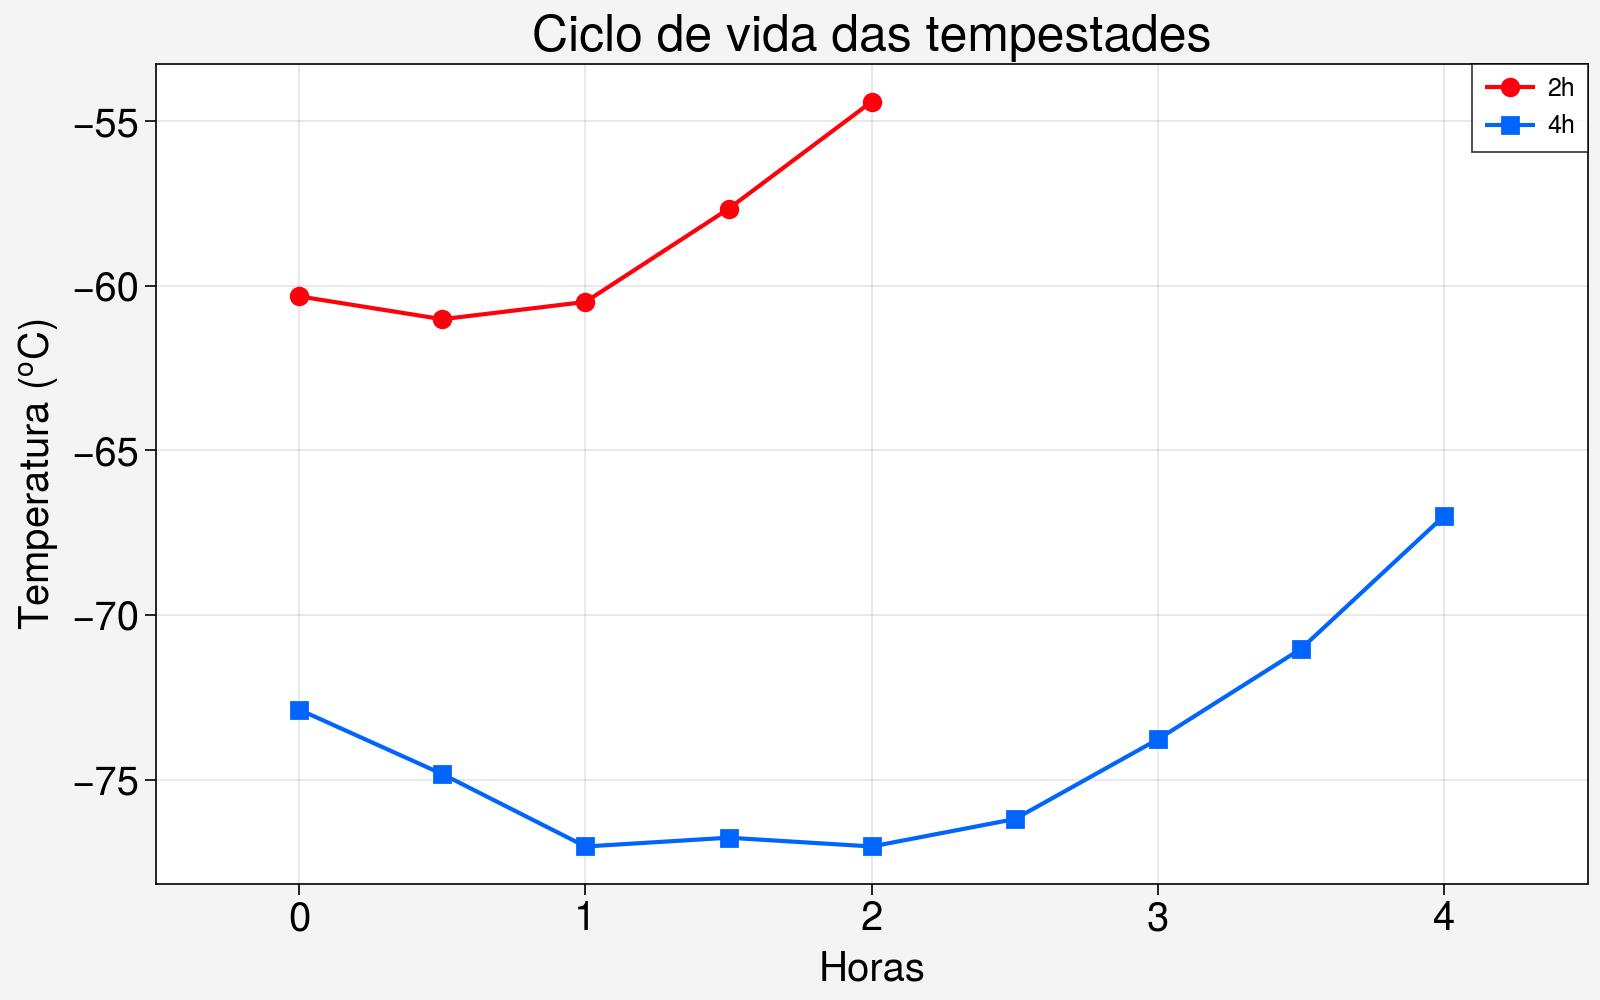

In [78]:
# cria a moldura da figura
fig, ax = plot.subplots(figsize=(8, 5), tight=True)

# plota gráfico de linha
ax.plot(df_2h['HORAS'].values, df_2h['MEDIA (CELSIUS)'].values, color='bright red', marker='o', label='2h')
ax.plot(df_4h['HORAS'].values, df_4h['MÉDIA (CELSIUS)'].values, color='bright blue', marker='s', label='4h')

# formatação de eixos etc
ax.format(xlabel='Horas',
          ylabel='Temperatura $(^oC)$',
          title='Ciclo de vida das tempestades',
          xtickminor=False,
          ytickminor=False,
          small='20px',
          large='25px',
          xlim=(-0.5, 4.5))

# Adiona a legenda
ax.legend(ncols=1)

# salva figura
fig.save(f'{dir}output/Fig_4_ciclovida_temperatura_tempestades.jpg', dpi=300, bbox_inches='tight')

# exibe na tela
plot.show()